In [1]:
! pip3 install pulp

     |████████████████████████████████| 14.2 MB 11.4 MB/s 


In [2]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#a handful of sites
sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen','Dublin','Hamburg','Istanbul','Kiev','London','Madrid','Milan','Moscow','Munich','Paris','Prague','Rome','Saint Petersburg','Sofia','Stockholm','Vienna','Warsaw','Beijing','Shanghai','Guangzhou','Shenzhen','Hong Kong']
# sites = ['Barcelona','Belgrade','Berlin','Brussels','Bucharest','Budapest','Copenhagen']
latlng = ['latitude', 'longitude']


In [4]:
path_position = F"/content/gdrive/My Drive/vehicle_data/edmonton_position.csv"
position = pd.read_csv(path_position , index_col = "City")

In [ ]:
path_flighttime = F"/content/gdrive/My Drive/vehicle_data/flight_time.csv"
flighttime = pd.read_csv(path_flighttime, index_col="City")

In [5]:
path_distance = F"/content/gdrive/My Drive/vehicle_data/edmonton_distance.csv"
distance = pd.read_csv(path_distance, index_col="City")
# print(len(sites))

In [6]:
print(distance)

                     Barcelona      Belgrade        Berlin      Brussels  \
City                                                                       
Barcelona             0.000000   7013.219963   5731.681634   3929.182709   
Belgrade           7013.219963      0.000000  11704.402180   9642.040625   
Berlin             5731.681634  11704.402180      0.000000   3776.116899   
Brussels           3929.182709   9642.040625   3776.116899      0.000000   
Bucharest         13504.551840   7717.705539  16156.305210  12926.200450   
Budapest           5883.741729   8104.595890   7616.024304   4107.761745   
Copenhagen         7030.965783  12727.001160   3490.479837   3577.401533   
Dublin             9554.870222   6499.367981  11834.631710   8326.369156   
Hamburg           11363.003100   7000.977287  13642.764590  10134.502030   
Istanbul           7646.708079  12956.739760   4612.105686   4193.143829   
Kiev              11618.038450  17300.643180   6533.249062   8164.474196   
London      

In [7]:
# city = '0'
# position.loc[city, 'longitude']
print(position)

                    latitude  longitude
City                                   
Barcelona        -113.578003  53.531799
Belgrade         -113.575996  53.476399
Berlin           -113.553001  53.570499
Brussels         -113.536003  53.542801
Bucharest        -113.518997  53.439701
Budapest         -113.512001  53.517700
Copenhagen       -113.509003  53.559200
Dublin           -113.495003  53.487202
Hamburg          -113.495003  53.469799
Istanbul         -113.494003  53.555199
Kiev             -113.491997  53.594898
London           -113.490997  53.614399
Madrid           -113.486000  53.518200
Milan            -113.485001  53.467899
Moscow           -113.461998  53.424500
Munich           -113.443001  53.482201
Paris            -113.418999  53.540798
Prague           -113.414001  53.597401
Rome             -113.400002  53.621700
Saint Petersburg -113.370003  53.479000
Sofia            -113.324997  53.512402
Stockholm        -113.323998  53.511501
Vienna           -113.320999  53.539700


In [8]:
#make some positions (so we can plot this)
# sites = [i+1 for i in range(29)]
positions = dict( ( city, (position.loc[city, 'longitude'], position.loc[city, 'latitude']) ) for city in sites)

In [9]:
print(positions)

{'Barcelona': (53.5317993, -113.5780029), 'Belgrade': (53.4763985, -113.5759964), 'Berlin': (53.5704994, -113.5530014), 'Brussels': (53.5428009, -113.5360031), 'Bucharest': (53.4397011, -113.5189972), 'Budapest': (53.5177002, -113.512001), 'Copenhagen': (53.5592003, -113.5090027), 'Dublin': (53.4872017, -113.4950027), 'Hamburg': (53.469799, -113.4950027), 'Istanbul': (53.5551987, -113.4940033), 'Kiev': (53.5948982, -113.4919968), 'London': (53.614399, -113.4909973), 'Madrid': (53.5181999, -113.4860001), 'Milan': (53.4678993, -113.4850006), 'Moscow': (53.4244995, -113.461998), 'Munich': (53.4822006, -113.4430008), 'Paris': (53.5407982, -113.4189987), 'Prague': (53.5974007, -113.4140015), 'Rome': (53.6217003, -113.4000015), 'Saint Petersburg': (53.4790001, -113.3700027), 'Sofia': (53.5124016, -113.3249969), 'Stockholm': (53.5115013, -113.3239975), 'Vienna': (53.5396996, -113.3209991), 'Warsaw': (53.5670013, -113.3180008), 'Beijing': (53.5415001, -113.3170013), 'Shanghai': (53.5387001, -1

s is  Barcelona
s is  Belgrade
s is  Berlin
s is  Brussels
s is  Bucharest
s is  Budapest
s is  Copenhagen
s is  Dublin
s is  Hamburg
s is  Istanbul
s is  Kiev
s is  London
s is  Madrid
s is  Milan
s is  Moscow
s is  Munich
s is  Paris
s is  Prague
s is  Rome
s is  Saint Petersburg
s is  Sofia
s is  Stockholm
s is  Vienna
s is  Warsaw
s is  Beijing
s is  Shanghai
s is  Guangzhou
s is  Shenzhen
s is  Hong Kong


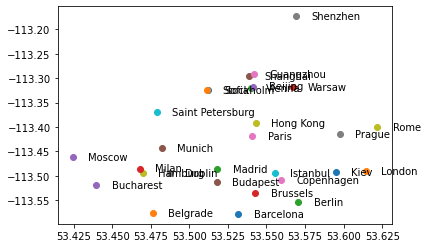

In [10]:

for s in positions:
    print("s is ",s)
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    #plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
# plt.gca()#.axis('off');
plt.show()

In [11]:
print(type(distance))
print(distance)

<class 'pandas.core.frame.DataFrame'>
                     Barcelona      Belgrade        Berlin      Brussels  \
City                                                                       
Barcelona             0.000000   7013.219963   5731.681634   3929.182709   
Belgrade           7013.219963      0.000000  11704.402180   9642.040625   
Berlin             5731.681634  11704.402180      0.000000   3776.116899   
Brussels           3929.182709   9642.040625   3776.116899      0.000000   
Bucharest         13504.551840   7717.705539  16156.305210  12926.200450   
Budapest           5883.741729   8104.595890   7616.024304   4107.761745   
Copenhagen         7030.965783  12727.001160   3490.479837   3577.401533   
Dublin             9554.870222   6499.367981  11834.631710   8326.369156   
Hamburg           11363.003100   7000.977287  13642.764590  10134.502030   
Istanbul           7646.708079  12956.739760   4612.105686   4193.143829   
Kiev              11618.038450  17300.643180   653

In [12]:
# get distanc between cities
distances = dict( ((s1,s2), distance.loc[s1, s2] ) for s1 in positions for s2 in positions if s1!=s2)

## The model

For **K** oil tanker truck:

### Variables:

$x_{ij}=
\begin{cases}
1: \text{the path goes from node i to j}\\
0: \text{no path (otherwise)}
\end{cases}$

### order dummy variables:
N = 29
K = 1,2,3,....

$u_i - u_j + C*x_{ij} \leq C - d_j, C = N/K$
$\begin{cases}
u_i: \text{the load left in the vehicle after visiting node i}\\
d_j: \text{demand of node j}, 0 \leq u_i \leq C - d_j, \forall i \in V \setminus \{0\}
\end{cases}$

### Goal:

$min\sum_{i=0}^{n}\sum_{j\neq{i}, j=0}^{n}{c_{ij}}{x_{ij}}$
$\begin{cases}
c_{ij}: \text{distance from node i to node j}\\
x_{ij}: \text{whether there's a path between i and j}
\end{cases}$

### Constraints:

$\sum_{i\in{V}}{x_{ij} = 1}, \forall j \in V \setminus \{0\}$

$\sum_{j\in{V}}{x_{ij} = 1}, \forall i \in V \setminus \{0\}$

$\sum_{i\in{V}}{x_{i0} = K}$

$\sum_{j\in{V}}{x_{0j} = K}$

In [59]:
K = 2 #the number of sales people 

In [60]:
#create the problme
prob=LpProblem("vehicle", LpMinimize)

In [62]:
print(sites.index(i) for i in sites)
starting_point = sites[-1]

<generator object <genexpr> at 0x7f86fdcd3c50>


In [63]:
#indicator variable if site i is connected to site j in the tour
x = LpVariable.dicts('x', distances, 0, 1, LpBinary)
#dummy vars to eliminate subtours
u = LpVariable.dicts('u', sites, 0, len(sites)-1, LpInteger)

In [64]:
#the objective
cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [65]:
#constraints
for k in sites:
    cap = 1 if k != starting_point else K
    #inbound connection
    prob+= lpSum([ x[(i,k)] for i in sites if (i,k) in x]) ==cap
    #outbound connection
    prob+=lpSum([ x[(k,i)] for i in sites if (k,i) in x]) ==cap
    
#subtour elimination
N=len(sites)/K
for i in sites:
    for j in sites:
        if i != j and (i != starting_point and j!= starting_point) and (i,j) in x:
            prob += u[i] - u[j] <= (N)*(1-x[(i,j)]) - 1

Solve it!

In [ ]:
%time prob.solve()
print(LpStatus[prob.status])

In [34]:
non_zero_edges = [ e for e in x if value(x[e]) != 0 ]

def get_next_site(parent):
    '''helper function to get the next edge'''
    edges = [e for e in non_zero_edges if e[0]==parent]
    for e in edges:
        non_zero_edges.remove(e)
    return edges

In [35]:
tours = get_next_site(starting_point)
tours = [ [e] for e in tours ]

for t in tours:
    while t[-1][1] !=starting_point:
        t.append(get_next_site(t[-1][1])[-1])

The optimal route:

In [45]:
sites.index('Hong Kong')

28

In [55]:
str_print = ''
for ab in t:
    str_print += str(sites.index(ab[0]) + 1) + ' -> '
str_print
    # print(' -> '+ )
    # print(' -> '.join([ a for a,b in t]+[starting_point]))
    # print(' -> '.join([ t.index(a) for a,b in t]+[starting_point]))
    # print(t[0])
    # print(' -> '.join([ sites.index(a) for a,b in t]+[starting_point]))

'29 -> 23 -> 25 -> 24 -> 28 -> 27 -> 26 -> 21 -> 22 -> 20 -> 16 -> 13 -> 6 -> 8 -> 9 -> 14 -> 15 -> 5 -> 2 -> 1 -> 4 -> 3 -> 7 -> 10 -> 11 -> 12 -> 19 -> 18 -> 17 -> '

Calculate total time:

In [38]:
totalTime = 0;
for t in tours:
    time = 0
    for i in range(0, len(t)):
        time += 1#flighttime.loc[t[i][0], t[i][1]]
#         print(flighttime.loc[t[i][0], t[i][1]])
#     print(time)
    if time > totalTime:
        totalTime = time
print(totalTime)

29


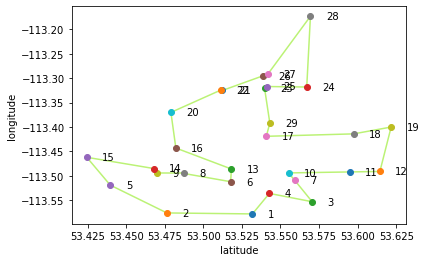

In [56]:
#draw the tours
colors = [np.random.rand(3) for i in range(len(tours))]
for t,c in zip(tours,colors):
    for a,b in t:
        p1,p2 = positions[a], positions[b]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]], color=c)

#draw the map again
count = 0
for s in positions:
    count += 1
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],str(count),horizontalalignment='left',verticalalignment='center')

#plt.title('%d '%K + 'people' if K > 1 else 'person')
plt.title('')
plt.xlabel('latitude')
plt.ylabel('longitude')
# plt.gca().axis('off')
plt.show()

In [58]:
# print('Longest time spent:', totalTime, '(min)')
print('Total distance:', value(prob.objective), '(m)')

Total distance: 128511.52903179996 (m)
